# Retail  Analysis

### Import Necessary Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
df= pd.read_excel("D:\Retail Analytics.xlsx")

In [6]:
df.shape

(541910, 8)

In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Clean up the data

In [9]:
pd.isnull(df).sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(406830, 8)

### Add Month Column

In [12]:
df['InvoiceDate'] = df['InvoiceDate'].astype('str')

In [13]:
df['Month']=df['InvoiceDate'].str[5:7]
df['Month'] = df['Month'].astype('int')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,11
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,10
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406830 non-null  object 
 1   StockCode    406830 non-null  object 
 2   Description  406830 non-null  object 
 3   Quantity     406830 non-null  int64  
 4   InvoiceDate  406830 non-null  object 
 5   Price        406830 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      406830 non-null  object 
 8   Month        406830 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 29.5+ MB


### Add Sales Column

In [15]:
df['Sales']= df['Quantity']*df['Price']

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Sales
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12,168469.6
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,77183.6
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,11,0.0
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,10,1008.0
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,5,3096.0


In [16]:
df[['Quantity','Price','Sales']].describe()

,Quantity,Price,Sales
count,406830.000000,406830.000000,406830.000000
mean,13.412248,3.460507,23.407241
std,248.623865,69.315080,427.437204
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,4.680000
50%,5.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,38970.000000,168469.600000


#  What was the best month for sales? How much was earned that month?

In [17]:
df.groupby(['Month'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Month,Sales
11,12,1284720.960
10,11,1191227.020
9,10,1104033.990
8,9,974236.392
5,6,714414.220
4,5,708938.040
7,8,674319.800
0,1,663815.700
6,7,625943.541
2,3,611036.910


[Text(0, 0, '663816'),
 Text(0, 0, '457729'),
 Text(0, 0, '611037'),
 Text(0, 0, '512353'),
 Text(0, 0, '708938'),
 Text(0, 0, '714414'),
 Text(0, 0, '625944'),
 Text(0, 0, '674320'),
 Text(0, 0, '974236'),
 Text(0, 0, '1.10403e+06'),
 Text(0, 0, '1.19123e+06'),
 Text(0, 0, '1.28472e+06')]

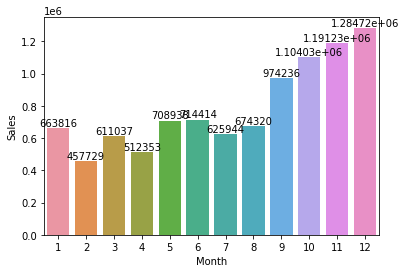

In [18]:
# plotting a bar chart for Sales vs Month

sales_mon = df.groupby(['Month'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

ax=sns.barplot(x = 'Month',y= 'Sales' ,data = sales_mon)
bars= ax.containers[0]
ax.bar_label(bars)

### What country had the highst number of sales?

In [19]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Month', 'Sales'],
      dtype='object')

In [20]:
df.groupby(['Country'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Country,Sales
35,United Kingdom,7.848910e+06
23,Netherlands,2.862311e+05
10,EIRE,2.808066e+05
14,Germany,2.360361e+05
13,France,2.213533e+05
0,Australia,1.399654e+05
30,Spain,6.837964e+04
32,Switzerland,5.714850e+04
3,Belgium,4.148172e+04
31,Sweden,4.016075e+04


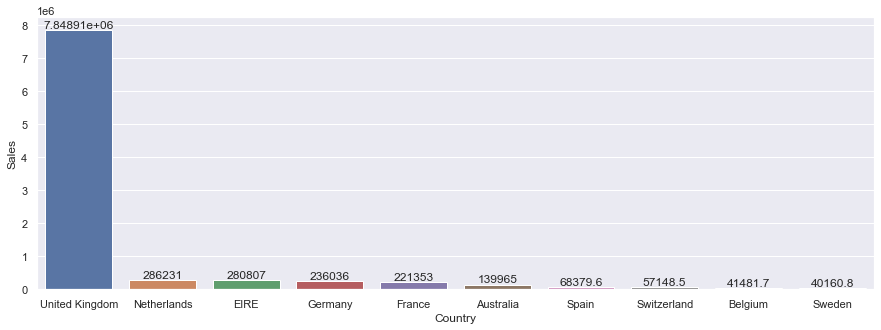

In [21]:
sales_con=df.groupby(['Country'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sc=sns.barplot(x='Country',y='Sales',data= sales_con)
for bars in sc.containers:
    sc.bar_label(bars)

### what time should we display advertisements to maximize likelihood of customer's buying product

In [22]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [23]:
df['Hour']= df['InvoiceDate'].dt.hour
df['Minute']=df['InvoiceDate'].dt.minute
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Sales,Hour,Minute
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12,168469.6,9,15
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,77183.6,10,1
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,11,0.0,15,57
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,10,1008.0,12,26
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,5,3096.0,10,52


# Graph between Sales vs Hour to analyze best time for advertisement

In [24]:
df.groupby(['Hour'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)

,Hour,Sales
6,12,1420069.190
4,10,1371828.181
7,13,1223854.070
5,11,1154478.590
8,14,1042654.921
9,15,1033424.640
3,9,1030095.511
10,16,490380.710
2,8,284127.990
11,17,255851.311


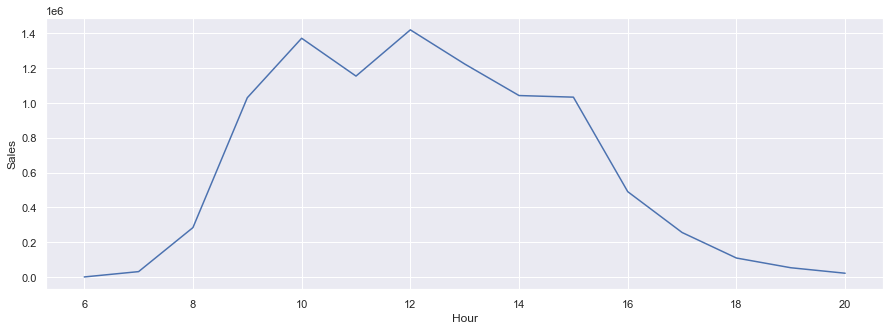

In [25]:
sales_hour=df.groupby(['Hour'],as_index=False)['Sales'].sum().sort_values(by='Sales',ascending=False)
sh=sns.lineplot(x='Hour',y='Sales',data= sales_hour)

#my recommendation is around 10 am

### what product sold the most? why do you think it sold the most?

In [26]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Sales,Hour,Minute
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12,168469.6,9,15
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,77183.6,10,1
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,11,0.0,15,57
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,10,1008.0,12,26
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,5,3096.0,10,52


In [27]:
df.groupby(['Description'],as_index=False)['Quantity'].sum().sort_values(by="Quantity",ascending=False)

,Description,Quantity
2329,"PAPER CRAFT , LITTLE BIRDIE",161990
2002,MEDIUM CERAMIC TOP STORAGE JAR,152410
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55615
1771,JUMBO BAG RED RETROSPOT,47296
3716,WHITE HANGING HEART T-LIGHT HOLDER,39303
...,...,...
3402,SWEETHEART KEY CABINET,1
3562,VINTAGE BEAD PINK JEWEL STAND,1
447,BLUE LEAVES AND BEADS PHONE CHARM,1
2135,MUMMY MOUSE RED GINGHAM RIBBON,1


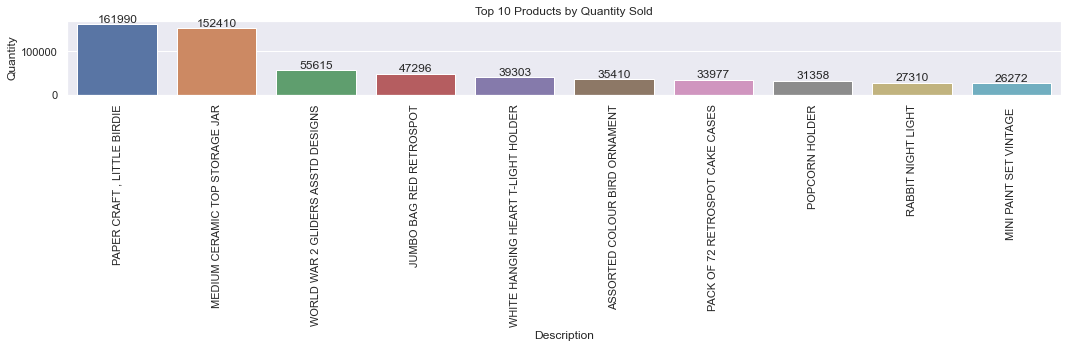

In [28]:
Max_Product = df.groupby(['Description'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sc = sns.barplot(x='Description', y='Quantity', data=Max_Product)
plt.xticks(rotation=90)
plt.title("Top 10 Products by Quantity Sold")

# Add value labels on bars
for bar in sc.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

<Axes: xlabel='Invoice'>

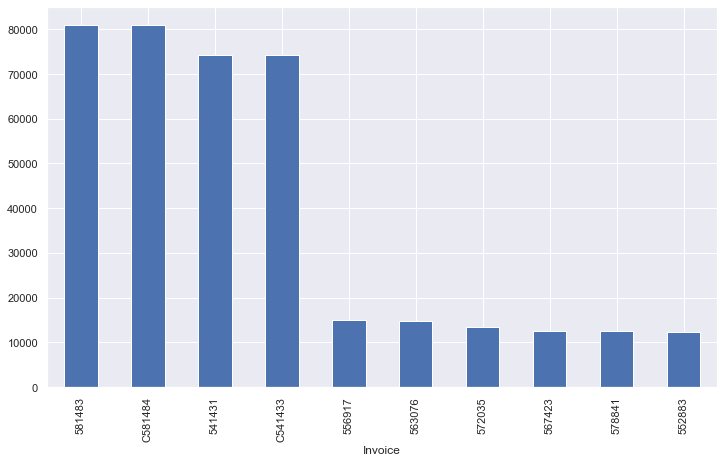

In [29]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Invoice')['Quantity'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Country', ylabel='Quantity'>

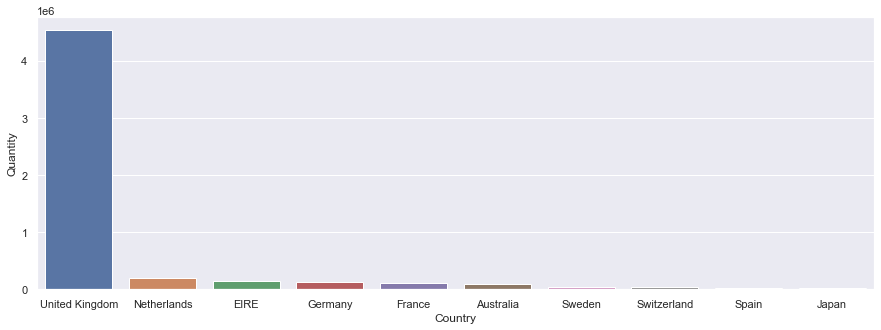

In [30]:
# total number of orders from top 10 states

sales_state = df.groupby(['Country'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'Country',y= 'Quantity')

<Axes: xlabel='Country', ylabel='Quantity'>

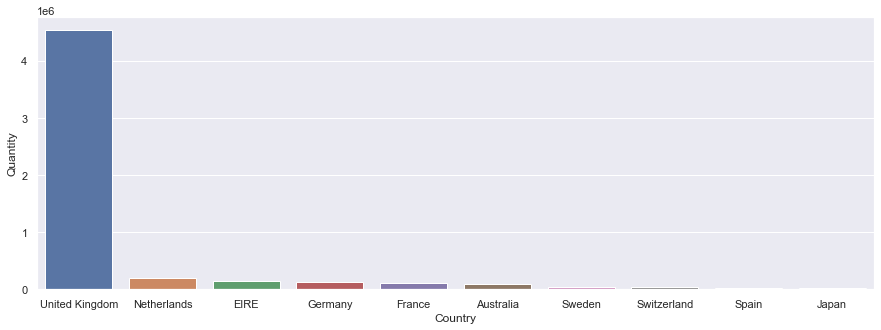

In [31]:

# total number of orders from top 10 states

sales_state = df.groupby(['Country'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'Country',y= 'Quantity')

In [32]:

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Sales,Hour,Minute
0,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,12,168469.6,9,15
1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,1,77183.6,10,1
2,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom,11,0.0,15,57
3,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom,10,1008.0,12,26
4,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom,5,3096.0,10,52


 #  "Top 10 Products by Revenue"

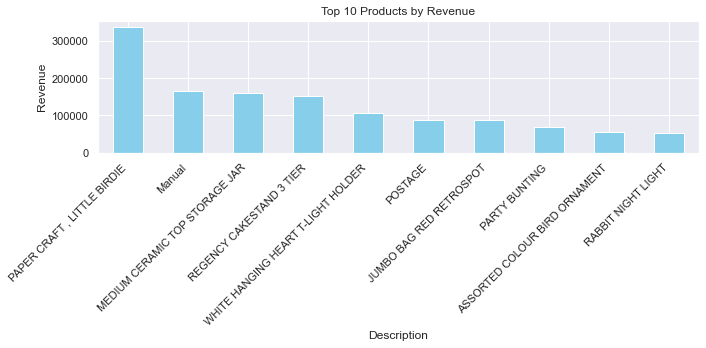

In [33]:
df['TotalPrice'] = df['Quantity'] * df['Price']

top10_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

top10_revenue.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#  "Top 10 products by Quantity sold"



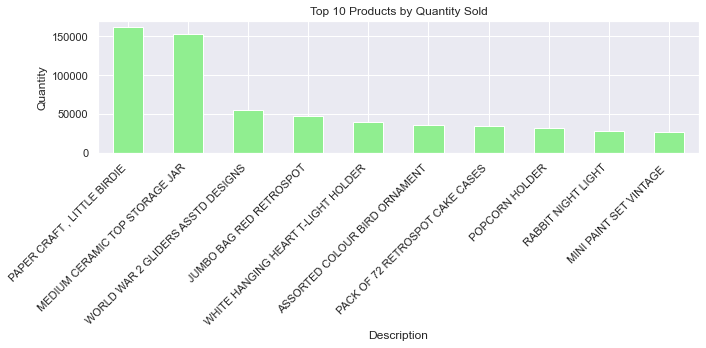

In [34]:

top10_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top10_quantity.plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title('Top 10 Products by Quantity Sold')
plt.ylabel('Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 #  "Country-Wise best-Selling Products"

In [35]:
best_product_country = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()
top_products_country = best_product_country.sort_values(['Country', 'Quantity'], ascending=[True, False]).drop_duplicates(['Country'])

top_products_country.head(10)  # Shows top product per country


,Country,Description,Quantity
287,Australia,MINI PAINT SET VINTAGE,2988
854,Austria,SET 12 KIDS COLOUR CHALK STICKS,288
921,Bahrain,ICE CREAM SUNDAE LIP GLOSS,96
1348,Belgium,PACK OF 72 RETROSPOT CAKE CASES,480
1719,Brazil,DOLLY GIRL LUNCH BOX,24
1847,Canada,RETRO COFFEE MUGS ASSORTED,504
2185,Channel Islands,RAIN PONCHO,407
2527,Cyprus,HEART DECORATION PAINTED ZINC,384
2844,Czech Republic,PINK METAL CHICKEN HEART,72
3016,Denmark,RED HARMONICA IN BOX,288


 #  "Seasonality of Top Products"


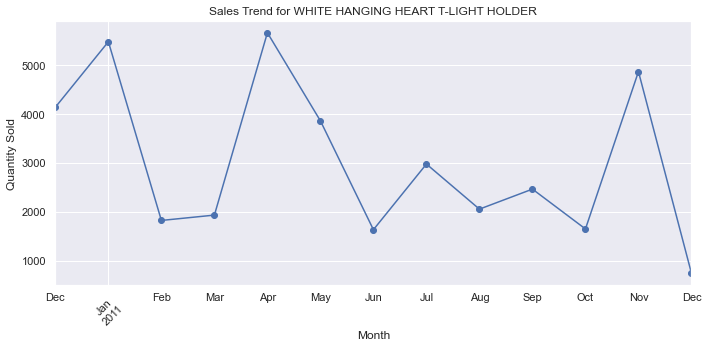

In [36]:

df['Month'] = df['InvoiceDate'].dt.to_period('M')
product = 'WHITE HANGING HEART T-LIGHT HOLDER'  # Replace with top product

seasonality = df[df['Description'] == product].groupby('Month')['Quantity'].sum()
seasonality.plot(kind='line', marker='o', figsize=(10,5))
plt.title(f'Sales Trend for {product}')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  "Customer analysis"




# Unique customers



In [37]:
unique_customers = df['Customer ID'].nunique()
print("Total unique customers:",unique_customers)

Total unique customers: 4372


# Repeat vs One -Time Buyers


In [38]:

customer_purchase_counts = df.groupby('Customer ID')['Invoice'].nunique()
repeat_customers = customer_purchase_counts[customer_purchase_counts > 1].count()
one_time_customers = customer_purchase_counts[customer_purchase_counts == 1].count()

print(f"Repeat customers: {repeat_customers}")
print(f"One-time customers: {one_time_customers}")

Repeat customers: 3059
One-time customers: 1313


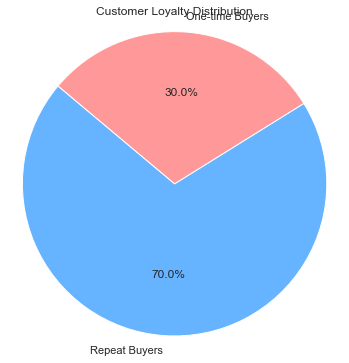

In [39]:

labels = ['Repeat Buyers', 'One-time Buyers']
sizes = [repeat_customers, one_time_customers]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Customer Loyalty Distribution')
plt.axis('equal')
plt.show()

# Top 10 customers by spend



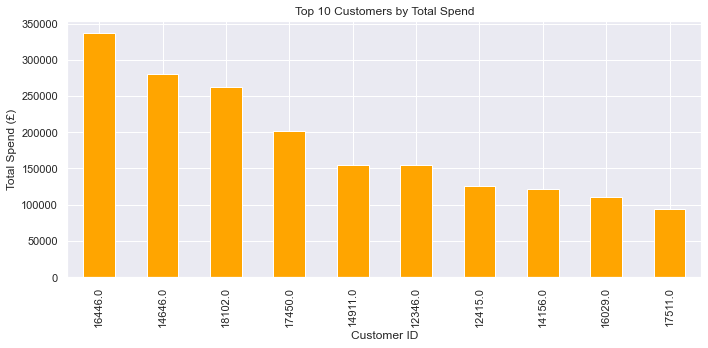

In [40]:

df['TotalPrice'] = df['Quantity'] * df['Price']
top_spenders = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

top_spenders.plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Top 10 Customers by Total Spend')
plt.ylabel('Total Spend (£)')
plt.xlabel('Customer ID')
plt.tight_layout()
plt.show()

# Top customers and products



In [41]:

top3_ids = top_spenders.head(3).index
df_top3 = df[df['Customer ID'].isin(top3_ids)]

customer_product_pivot = df_top3.pivot_table(index='Customer ID', columns='Description', values='Quantity', aggfunc='sum').fillna(0)
customer_product_pivot.T.sort_values(by=top3_ids[0], ascending=False).head(5)  # Most bought by top customer


Customer ID,14646.0,16446.0,18102.0
Description,,,
"PAPER CRAFT , LITTLE BIRDIE",0.0,161990.0,0.0
PANTRY SCRUBBING BRUSH,0.0,1.0,0.0
PANTRY PASTRY BRUSH,0.0,1.0,0.0
DOLLY GIRL BEAKER,1201.0,0.0,0.0
RED RETROSPOT MINI CASES,216.0,0.0,0.0


#  RFM Segmentation



In [42]:
df['TotalPrice'] = df['Quantity'] * df['Price']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Set a reference date (latest date in your dataset):

latest_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# Create the RFM table

In [65]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days, #recency
    'Invoice': 'nunique',
    #Frequency
    'TotalPrice': 'sum'
    #Monetary
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

In [66]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

# Combine scores into one RFM segment:

In [67]:

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)


In [68]:

def segment(rfm_score):
    if rfm_score >= 9:
        return 'Champions'
    elif rfm_score >= 7:
        return 'Loyal'
    elif rfm_score >= 5:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment)


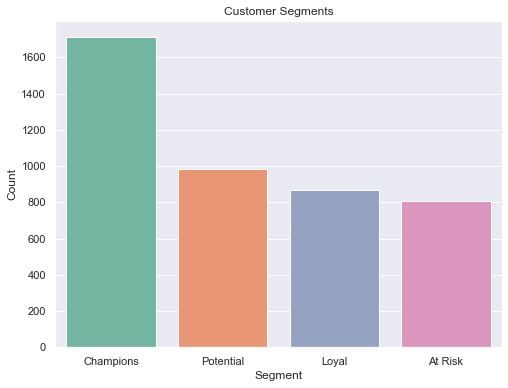

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(x='Segment', data=rfm, order=rfm['Segment'].value_counts().index, palette='Set2')
plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

# Anomaly Detection


# Top 1% transactions by total price

In [70]:
threshold=df['TotalPrice'].quantile(0.99)
df['IsAnomalyTransaction'] = df['TotalPrice']>threshold
high_value_orders=df[df['TotalPrice']>threshold]
print('top 1% high')
print(high_value_orders[['Invoice','Customer ID','TotalPrice']].head())

top 1% high
  Invoice  Customer ID  TotalPrice
0  581483      16446.0   168469.60
1  541431      12346.0    77183.60
3  573008      12901.0     1008.00
4  554868      13135.0     3096.00
5  544612      18087.0     3202.92


In [71]:
# Set date only
df['Dateonly'] = df['InvoiceDate'].dt.date

# Group by date
daily_sales = df.groupby('Dateonly')['TotalPrice'].sum().reset_index()

# Get threshold for spike
sales_threshold = daily_sales['TotalPrice'].quantile(0.99)

# Get spike days
spike_days = daily_sales[daily_sales['TotalPrice'] > sales_threshold]

# list of spike dates
spike_days_list = spike_days['Dateonly'].tolist()

# IsAnomalyDay in main df
df['IsAnomalyDay'] = df['Dateonly'].isin(spike_days_list)

# plot distribution of quantity

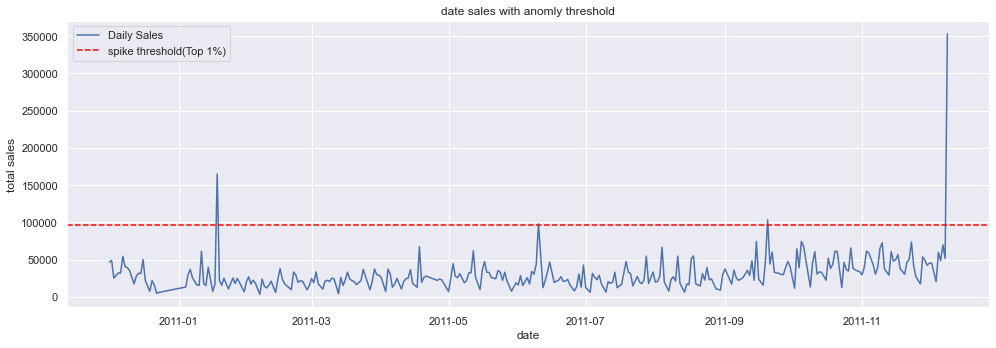

In [72]:
plt.figure(figsize=(14,5))
plt.plot(daily_sales['Dateonly'],daily_sales['TotalPrice'],label='Daily Sales')
plt.axhline(sales_threshold,color='red',linestyle='--',label='spike threshold(Top 1%)')
plt.title("date sales with anomly threshold")
plt.xlabel("date")
plt.ylabel('total sales')
plt.legend()
plt.tight_layout()
plt.show()

# Cohort Analysis

In [73]:
from operator import attrgetter
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CohortMonth'] = df.groupby('Customer ID')['InvoiceDate'].transform('min').dt.to_period('M')
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')


# Cohort Index

In [74]:
df['CohortIndex'] = (df['InvoiceMonth'] - df['CohortMonth']).apply(attrgetter('n'))

# Cohort Table

In [75]:
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

# Cohort Retention Heatmap

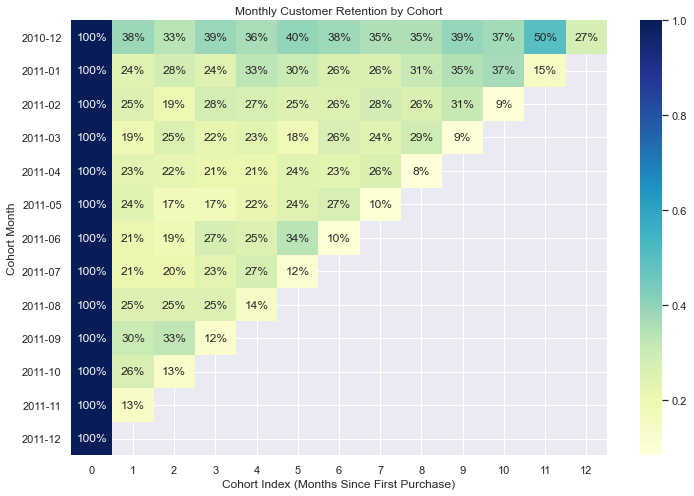

In [76]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(data=retention, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Monthly Customer Retention by Cohort')
plt.xlabel('Cohort Index (Months Since First Purchase)')
plt.ylabel('Cohort Month')
plt.show()


In [80]:
df_final = df.merge(rfm[['Customer ID','Recency','Frequency','Monetary','Segment']], on='Customer ID', how='left') \
             .merge(cohort_data[['Customer ID', 'CohortMonth', 'CohortIndex']], on='Customer ID', how='left') 

# Save to CSV
df_final.to_csv("Retail_Analytics_CleanData.csv", index=False)